note that disjoint the definition and libraries codes from others to run them every time you open vscode because of reloading kernel

Import required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [ ]:
train_df = pd.read_csv('H1.csv')
print(train_df)
train_df.count()

In [4]:
test_df = pd.read_csv('H2.csv')
print(test_df)
test_df.count()

       IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0               0         6             2015             July   
1               1        88             2015             July   
2               1        65             2015             July   
3               1        92             2015             July   
4               1       100             2015             July   
...           ...       ...              ...              ...   
79325           0        23             2017           August   
79326           0       102             2017           August   
79327           0        34             2017           August   
79328           0       109             2017           August   
79329           0       205             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                         27                      1                     0   
1                         27                      1              

IsCanceled                     79330
LeadTime                       79330
ArrivalDateYear                79330
ArrivalDateMonth               79330
ArrivalDateWeekNumber          79330
ArrivalDateDayOfMonth          79330
StaysInWeekendNights           79330
StaysInWeekNights              79330
Adults                         79330
Children                       79326
Babies                         79330
Meal                           79330
Country                        79306
MarketSegment                  79330
DistributionChannel            79330
IsRepeatedGuest                79330
PreviousCancellations          79330
PreviousBookingsNotCanceled    79330
ReservedRoomType               79330
AssignedRoomType               79330
BookingChanges                 79330
DepositType                    79330
DaysInWaitingList              79330
CustomerType                   79330
ADR                            79330
RequiredCarParkingSpaces       79330
TotalOfSpecialRequests         79330
R

In [5]:
train_df.isna().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialRequests           0
ReservationStatus                0
dtype: int64

In [6]:
test_df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationStatus               0
dtype: int64

In [7]:
train_df.shape

(40060, 28)

In [8]:
test_df.shape

(79330, 28)

In [9]:
train_df['Country'] = train_df['Country'].fillna(train_df['Country'].mode()[0])

In [10]:
test_df['Children'] = test_df['Children'].fillna(test_df['Children'].mode()[0])

In [11]:
test_df['Country'] = test_df['Country'].fillna(test_df['Country'].mode()[0])

In [12]:
train_df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
dtype: int64

In [13]:
test_df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
dtype: int64

In [14]:
print(train_df.shape)

(40060, 28)


In [15]:
test_df.shape

(79330, 28)

In [16]:
cat_cul = train_df.select_dtypes(include=['object']).columns
train_df = pd.get_dummies(train_df, columns = cat_cul)
train_df.shape

(40060, 201)

In [17]:
test_cat_cul = test_df.select_dtypes(include=['object']).columns
test_df = pd.get_dummies(test_df, columns = test_cat_cul)
test_df.shape

(79330, 240)

In [18]:
for column in train_df.columns:
    if column not in test_df.columns:
        test_df[column] = 0
for column in test_df.columns:
    if column not in train_df.columns:
        test_df.drop([column], axis=1, inplace=True)

In [19]:
test_df.shape

(79330, 201)

In [20]:
y_train_df = train_df['ADR']
y_train_df[y_train_df < 0]= 0
x_train_df = train_df.drop(labels=['ADR'], axis=1)
print(f'y_train_df shape is :{y_train_df.shape}')
print(f'x_train_df shape is :{x_train_df.shape}')

y_train_df shape is :(40060,)
x_train_df shape is :(40060, 200)


C:\Users\amira\AppData\Local\Temp\ipykernel_22932\3797034508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_df[y_train_df < 0]= 0


In [21]:
y_test_df = test_df['ADR']
y_test_df[y_test_df < 0]= 0
x_test_df = test_df.drop(labels=['ADR'], axis=1)
print(f'y_test_df shape is :{y_test_df.shape}')
print(f'x_test_df shape is :{x_test_df.shape}')

y_test_df shape is :(79330,)
x_test_df shape is :(79330, 200)


C:\Users\amira\AppData\Local\Temp\ipykernel_22932\3758364211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_df[y_test_df < 0]= 0


In [22]:
unique, counts = np.unique(y_train_df, return_counts=True)
print(np.asarray((unique, counts)).T)

[[0.00e+00 7.52e+02]
 [2.60e-01 1.00e+00]
 [1.56e+00 2.00e+00]
 ...
 [4.37e+02 1.00e+00]
 [4.50e+02 1.00e+00]
 [5.08e+02 1.00e+00]]


In [23]:
def def_model():
  model = tf.keras.Sequential() 
  model.add(tf.keras.Input(x_train_df.shape[1]))
  model.add(tf.keras.layers.Dense(256,activation="relu"))
  model.add(tf.keras.layers.Dense(128,activation="relu"))
  model.add(tf.keras.layers.Dense(64,activation="relu"))
  model.add(tf.keras.layers.Dense(128,activation="relu"))
  model.add(tf.keras.layers.Dense(256,activation="relu"))
  model.add(tf.keras.layers.Dense(1))

  return model

In [24]:
model = def_model()
model.compile(loss=tf.keras.losses.mse,optimizer=tf.keras.optimizers.Adam(0.001),metrics=["mae"])
history = model.fit(x_train_df,y_train_df,batch_size=32,epochs=30,verbose=1,validation_split=0.2,shuffle = True)

Epoch 1/30
1002/1002 [==============================] - 12s 6ms/step - loss: 2702.5352 - mae: 38.7660 - val_loss: 1439.7070 - val_mae: 27.2018
Epoch 2/30
1002/1002 [==============================] - 4s 4ms/step - loss: 1135.4795 - mae: 23.3576 - val_loss: 1925.0726 - val_mae: 34.1314
Epoch 3/30
1002/1002 [==============================] - 3s 3ms/step - loss: 931.1932 - mae: 20.5986 - val_loss: 1093.7297 - val_mae: 23.1813
Epoch 4/30
1002/1002 [==============================] - 3s 3ms/step - loss: 898.5551 - mae: 20.2004 - val_loss: 1224.4048 - val_mae: 24.4391
Epoch 5/30
1002/1002 [==============================] - 3s 3ms/step - loss: 890.1138 - mae: 20.0988 - val_loss: 774.2538 - val_mae: 18.9857
Epoch 6/30
1002/1002 [==============================] - 3s 3ms/step - loss: 874.5966 - mae: 19.8165 - val_loss: 1047.7355 - val_mae: 25.3322
Epoch 7/30
1002/1002 [==============================] - 3s 3ms/step - loss: 848.1734 - mae: 19.4164 - val_loss: 985.4318 - val_mae: 21.7670
Epoch 8/30
1

plot




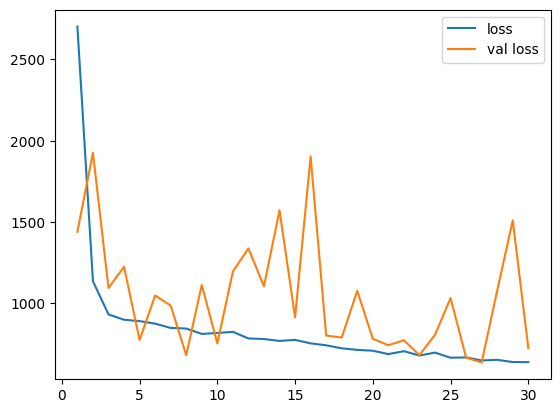

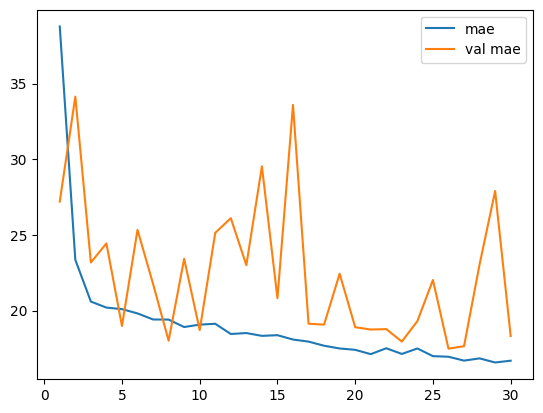

In [25]:
epochs_axis = np.arange(1, len(history.history['loss'])+1)
plt.figure()
plt.plot(epochs_axis,history.history['loss'], label='loss')
plt.plot(epochs_axis,history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs_axis,history.history['mae'], label='mae')
plt.plot(epochs_axis,history.history['val_mae'], label='val mae')
plt.legend()
plt.show()


50 epochs

In [26]:
model = def_model()
model.compile(loss=tf.keras.losses.mse,optimizer=tf.keras.optimizers.Adam(0.001),metrics=["mae"])
history = model.fit(x_train_df,y_train_df,batch_size=64,epochs=50,verbose=1,validation_split=0.2,shuffle = True)

Epoch 1/50
501/501 [==============================] - 3s 3ms/step - loss: 3149.0242 - mae: 42.7314 - val_loss: 2827.0264 - val_mae: 36.6707
Epoch 2/50
501/501 [==============================] - 2s 3ms/step - loss: 1420.9447 - mae: 26.7234 - val_loss: 1351.5796 - val_mae: 26.1132
Epoch 3/50
501/501 [==============================] - 1s 3ms/step - loss: 1021.9559 - mae: 21.8809 - val_loss: 718.7136 - val_mae: 18.1137
Epoch 4/50
501/501 [==============================] - 2s 3ms/step - loss: 894.9870 - mae: 20.0757 - val_loss: 970.2229 - val_mae: 21.3865
Epoch 5/50
501/501 [==============================] - 2s 3ms/step - loss: 912.8989 - mae: 20.3574 - val_loss: 1142.1304 - val_mae: 23.4619
Epoch 6/50
501/501 [==============================] - 2s 3ms/step - loss: 836.7480 - mae: 19.2513 - val_loss: 1089.2914 - val_mae: 23.4416
Epoch 7/50
501/501 [==============================] - 1s 3ms/step - loss: 815.0362 - mae: 18.9084 - val_loss: 794.5504 - val_mae: 19.2663
Epoch 8/50
501/501 [=======

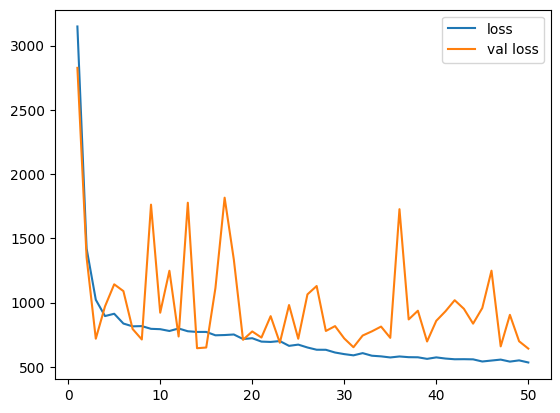

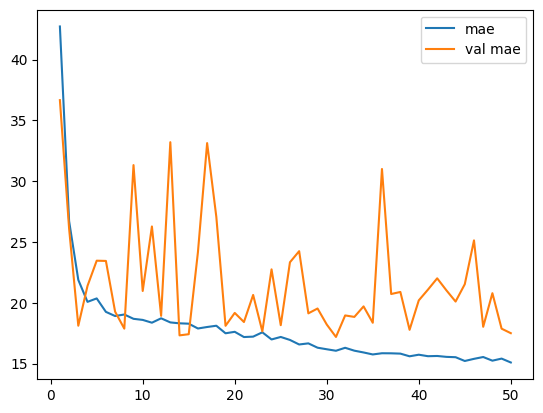

In [27]:
epochs_axis = np.arange(1, len(history.history['loss'])+1)
plt.figure()
plt.plot(epochs_axis,history.history['loss'], label='loss')
plt.plot(epochs_axis,history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs_axis,history.history['mae'], label='mae')
plt.plot(epochs_axis,history.history['val_mae'], label='val mae')
plt.legend()
plt.show()

In [28]:
model = def_model()
model.compile(loss=tf.keras.losses.mse,optimizer=tf.keras.optimizers.Adam(0.001),metrics=["mae"])
history = model.fit(x_train_df,y_train_df,batch_size=32,epochs=100,verbose=1,validation_split=0.2,shuffle = True)

Epoch 1/100
1002/1002 [==============================] - 4s 3ms/step - loss: 2767.5051 - mae: 39.3449 - val_loss: 1560.6741 - val_mae: 27.7994
Epoch 2/100
1002/1002 [==============================] - 3s 3ms/step - loss: 1242.9078 - mae: 24.6001 - val_loss: 1271.1019 - val_mae: 25.4489
Epoch 3/100
1002/1002 [==============================] - 3s 3ms/step - loss: 946.3480 - mae: 20.8304 - val_loss: 1271.3278 - val_mae: 25.4869
Epoch 4/100
1002/1002 [==============================] - 3s 3ms/step - loss: 926.0920 - mae: 20.6443 - val_loss: 966.9774 - val_mae: 21.2819
Epoch 5/100
1002/1002 [==============================] - 3s 3ms/step - loss: 882.8965 - mae: 19.9713 - val_loss: 790.8292 - val_mae: 19.0995
Epoch 6/100
1002/1002 [==============================] - 3s 3ms/step - loss: 859.9382 - mae: 19.6237 - val_loss: 995.6107 - val_mae: 21.9430
Epoch 7/100
1002/1002 [==============================] - 3s 3ms/step - loss: 843.1729 - mae: 19.3174 - val_loss: 933.1401 - val_mae: 20.9789
Epoch 8/

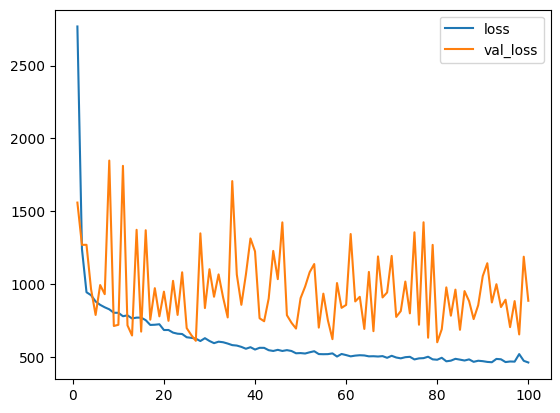

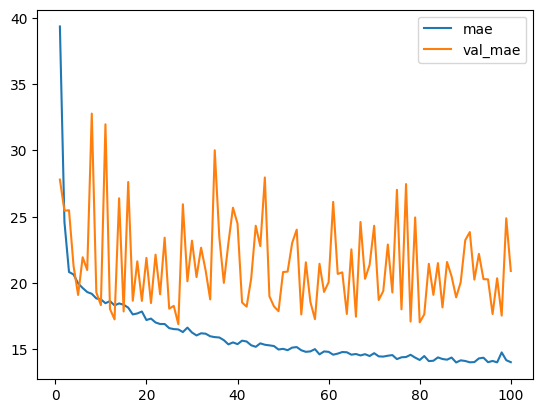

In [29]:
epochs_axis = np.arange(1, len(history.history['loss'])+1)
plt.figure()
plt.plot(epochs_axis,history.history['loss'],label='loss')
plt.plot(epochs_axis,history.history['val_loss'],label ='val_loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs_axis,history.history['mae'],label='mae')
plt.plot(epochs_axis,history.history['val_mae'],label='val_mae')
plt.legend()
plt.show()

In [30]:
y_test_df_predicted = model.predict(x_test_df)
test_mse_score, test_mae_score = model.evaluate(x_test_df, y_test_df)

2480/2480 [==============================] - 6s 2ms/step - loss: 3495.2710 - mae: 44.3534


In [31]:
print(y_test_df)
print(type(y_test_df))
y_test_df.shape

0          0.00
1         76.50
2         68.00
3         76.50
4         76.50
          ...  
79325     96.14
79326    225.43
79327    157.71
79328    104.40
79329    151.20
Name: ADR, Length: 79330, dtype: float64
<class 'pandas.core.series.Series'>


(79330,)

In [32]:
y_test_df = y_test_df.astype('float32')
print(y_test_df)

0          0.000000
1         76.500000
2         68.000000
3         76.500000
4         76.500000
            ...    
79325     96.139999
79326    225.429993
79327    157.710007
79328    104.400002
79329    151.199997
Name: ADR, Length: 79330, dtype: float32


In [33]:
y_test_df = pd.DataFrame(y_test_df)
display(y_test_df)

,ADR
0,0.000000
1,76.500000
2,68.000000
3,76.500000
4,76.500000
...,...
79325,96.139999
79326,225.429993
79327,157.710007
79328,104.400002


In [34]:
y_test_df_predicted = pd.DataFrame(y_test_df_predicted)
print(y_test_df_predicted)
print(type(y_test_df_predicted))
print(y_test_df_predicted.shape)
print(y_test_df_predicted.dtypes)

                0
0      177.165482
1      136.432556
2      125.667870
3      140.146973
4      135.195755
...           ...
79325  154.828354
79326  175.393433
79327  123.658028
79328  138.938019
79329  148.028931

[79330 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
(79330, 1)
0    float32
dtype: object


In [35]:
from numpy import disp

print(type(y_test_df))
print(type(y_test_df_predicted))
y_test_df_numpy= y_test_df.values
y_test_df_predicted_numpy = y_test_df_predicted.values
print(type(y_test_df_numpy))
print(type(y_test_df_predicted_numpy))
display(y_test_df_numpy)
display(y_test_df_predicted_numpy)

#split matrix into 3 columns each into 1d array

# arr1 = np.delete(y_test_df_numpy,[1,2],axis=1) 
# arr2 = np.delete(conv_arr,[0,2],axis=1) 
# arr3 = np.delete(conv_arr,[0,1],axis=1) 

#converting into 1D array
# y_test_df1 = y_test_df_numpy.ravel()
# y_test_df_predicted1 = y_test_df_predicted_numpy.ravel()
# display(y_test_df1)
# display(y_test_df_predicted1)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[  0.  ],
       [ 76.5 ],
       [ 68.  ],
       ...,
       [157.71],
       [104.4 ],
       [151.2 ]], dtype=float32)

array([[177.16548],
       [136.43256],
       [125.66787],
       ...,
       [123.65803],
       [138.93802],
       [148.02893]], dtype=float32)

In [36]:
compared_df = pd.DataFrame({'Real_ADR': [y_test_df_numpy],
                           'Predicted_ADR': [y_test_df_predicted_numpy],                   
                           'Diff':[y_test_df_predicted_numpy - y_test_df_numpy]}, columns = ['Real_ADR','predicted_ADR','Diff'])

compared_df.head(10)

,Real_ADR,predicted_ADR,Diff
0,"[[0.0], [76.5], [68.0], [76.5], [76.5], [76.5]...",NaN,"[[177.16548], [59.932556], [57.66787], [63.646..."
